In [1]:
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

In [3]:
print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


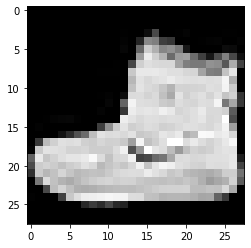

In [4]:
plt.imshow(x_train[0], cmap='gray')

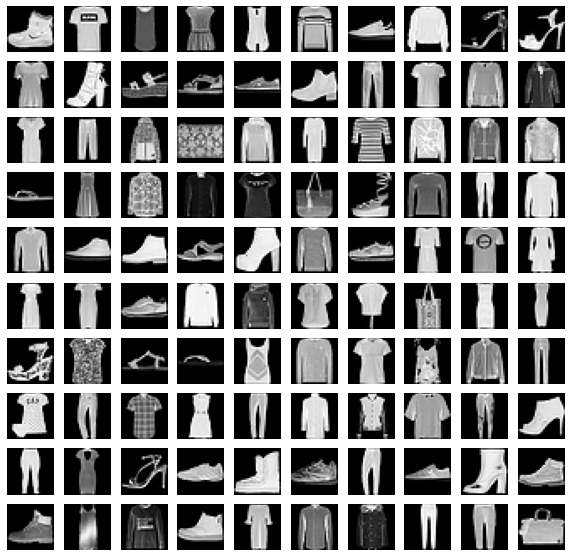

In [5]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')

In [6]:
label_list=np.zeros(10)
for i in range(len(t_train)):
    label = int(t_train[i])
    label_list[label]+=1
print(label_list)

[6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]


In [7]:
x_train = (x_train-0.0)/(255.0-0.0)
x_test = (x_test-0.0)/(255.0-0.0)
t_train = to_categorical(t_train, num_classes=10)
t_test = to_categorical(t_test, num_classes=10)

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(x_train, t_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7941 - accuracy: 0.7539 - val_loss: 0.5727 - val_accuracy: 0.8062
Epoch 2/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5206 - accuracy: 0.8268 - val_loss: 0.4957 - val_accuracy: 0.8306
Epoch 3/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4666 - accuracy: 0.8434 - val_loss: 0.4576 - val_accuracy: 0.8434
Epoch 4/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4371 - accuracy: 0.8510 - val_loss: 0.4376 - val_accuracy: 0.8484
Epoch 5/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4175 - accuracy: 0.8564 - val_loss: 0.4269 - val_accuracy: 0.8506
Epoch 6/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4025 - accuracy: 0.8616 - val_loss: 0.4159 - val_accuracy: 0.8573
Epoch 7/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3897 - accuracy: 0.8665 - val_loss: 0.4024 - val_ac

In [10]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 817us/step - loss: 0.3602 - accuracy: 0.8838


[0.3601686656475067, 0.8838000297546387]

In [11]:
predictions=model.predict(x_test)

313/313 [==============================] - 0s 702us/step


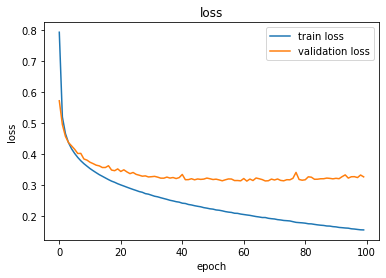

In [12]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

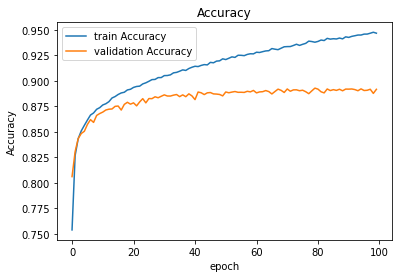

In [13]:
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train Accuracy')
plt.plot(hist.history['val_accuracy'], label='validation Accuracy')
plt.legend(loc='best')

<AxesSubplot:>

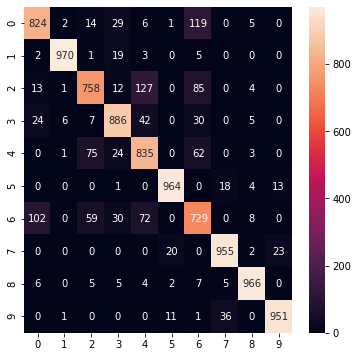

In [14]:
plt.figure(figsize=(6, 6))
cm = confusion_matrix(np.argmax(t_test, axis=-1), np.argmax(predictions, axis=-1))
sns.heatmap(cm, annot=True, fmt='d')